# Shelter Animals

Homework 1
Camille Girard
Fall 18

Knowing what might happen to your new furry friend

In [22]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot
import pandas as pd
import numpy as np

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


When walking you come across a shelter animal and wonder what will happen to the animal you just met. How about the more animals you meet?

In [23]:
class BayesTable(pd.DataFrame):
    def __init__(self, hypo, prior=1):
        columns = ['hypo', 'prior', 'likelihood', 'unnorm', 'posterior']
        super().__init__(columns=columns)
        self.hypo = hypo
        self.prior = prior
    
    def mult(self):
        self.unnorm = self.prior * self.likelihood
        
    def norm(self):
        nc = np.sum(self.unnorm)
        self.posterior = self.unnorm / nc
        return nc
    
    def update(self):
        self.mult()
        return self.norm()
    
    def reset(self):
        return BayesTable(self.hypo, self.posterior)

In [25]:
table = BayesTable(['Dog - Adopt', 'Dog - Stray & Return', 'Dog - Euthanized', 'Dog - Stay', 'Cat - Adopt', 'Cat - Stray & Return', 'Cat - Euthanized', 'Cat - Stay'], [0.508, 0.508, 0.508, 0.508, 0.492, 0.492, 0.492, 0.492])
table.likelihood =[0.485, 0.188, 0.203, 0.124, 0.5, 0.028, 0.269, 0.203]
table.mult()
table.update()
table

,hypo,prior,likelihood,unnorm,posterior
0,Dog - Adopt,0.508,0.485,0.246380,0.246380
1,Dog - Stray & Return,0.508,0.188,0.095504,0.095504
2,Dog - Euthanized,0.508,0.203,0.103124,0.103124
3,Dog - Stay,0.508,0.124,0.062992,0.062992
4,Cat - Adopt,0.492,0.500,0.246000,0.246000
5,Cat - Stray & Return,0.492,0.028,0.013776,0.013776
6,Cat - Euthanized,0.492,0.269,0.132348,0.132348
7,Cat - Stay,0.492,0.203,0.099876,0.099876


In [6]:
class Subclass(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 
        hypo: 
        """
        like = 1
        return like

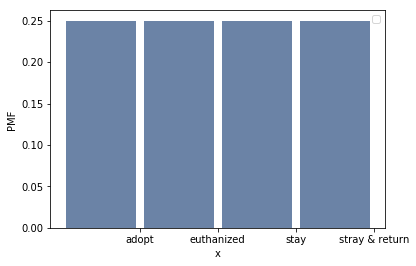

In [26]:
prior = Subclass(['adopt', 'stray & return', 'euthanized', 'stay'])
thinkplot.Hist(prior)
thinkplot.Config(xlabel='x', ylabel='PMF')

No handles with labels found to put in legend.


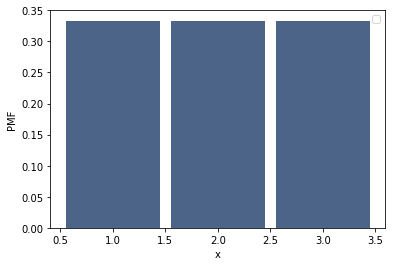

In [10]:
posterior = prior.Copy()
posterior.Update(1)
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(posterior)
thinkplot.Config(xlabel='x', ylabel='PMF')